# Business Problem


This Dataset contains the information about the customers like Sex, Marital status, Age, Education, Income Occupation etc. 
through which we can easily fit our model for better prediction.

Objective:The Objective of the problem is to create a clustering model between Age and Income.


# Data Understanding and EDA

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
df=pd.read_csv("segmentation data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [46]:
df.shape

(2000, 8)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [48]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

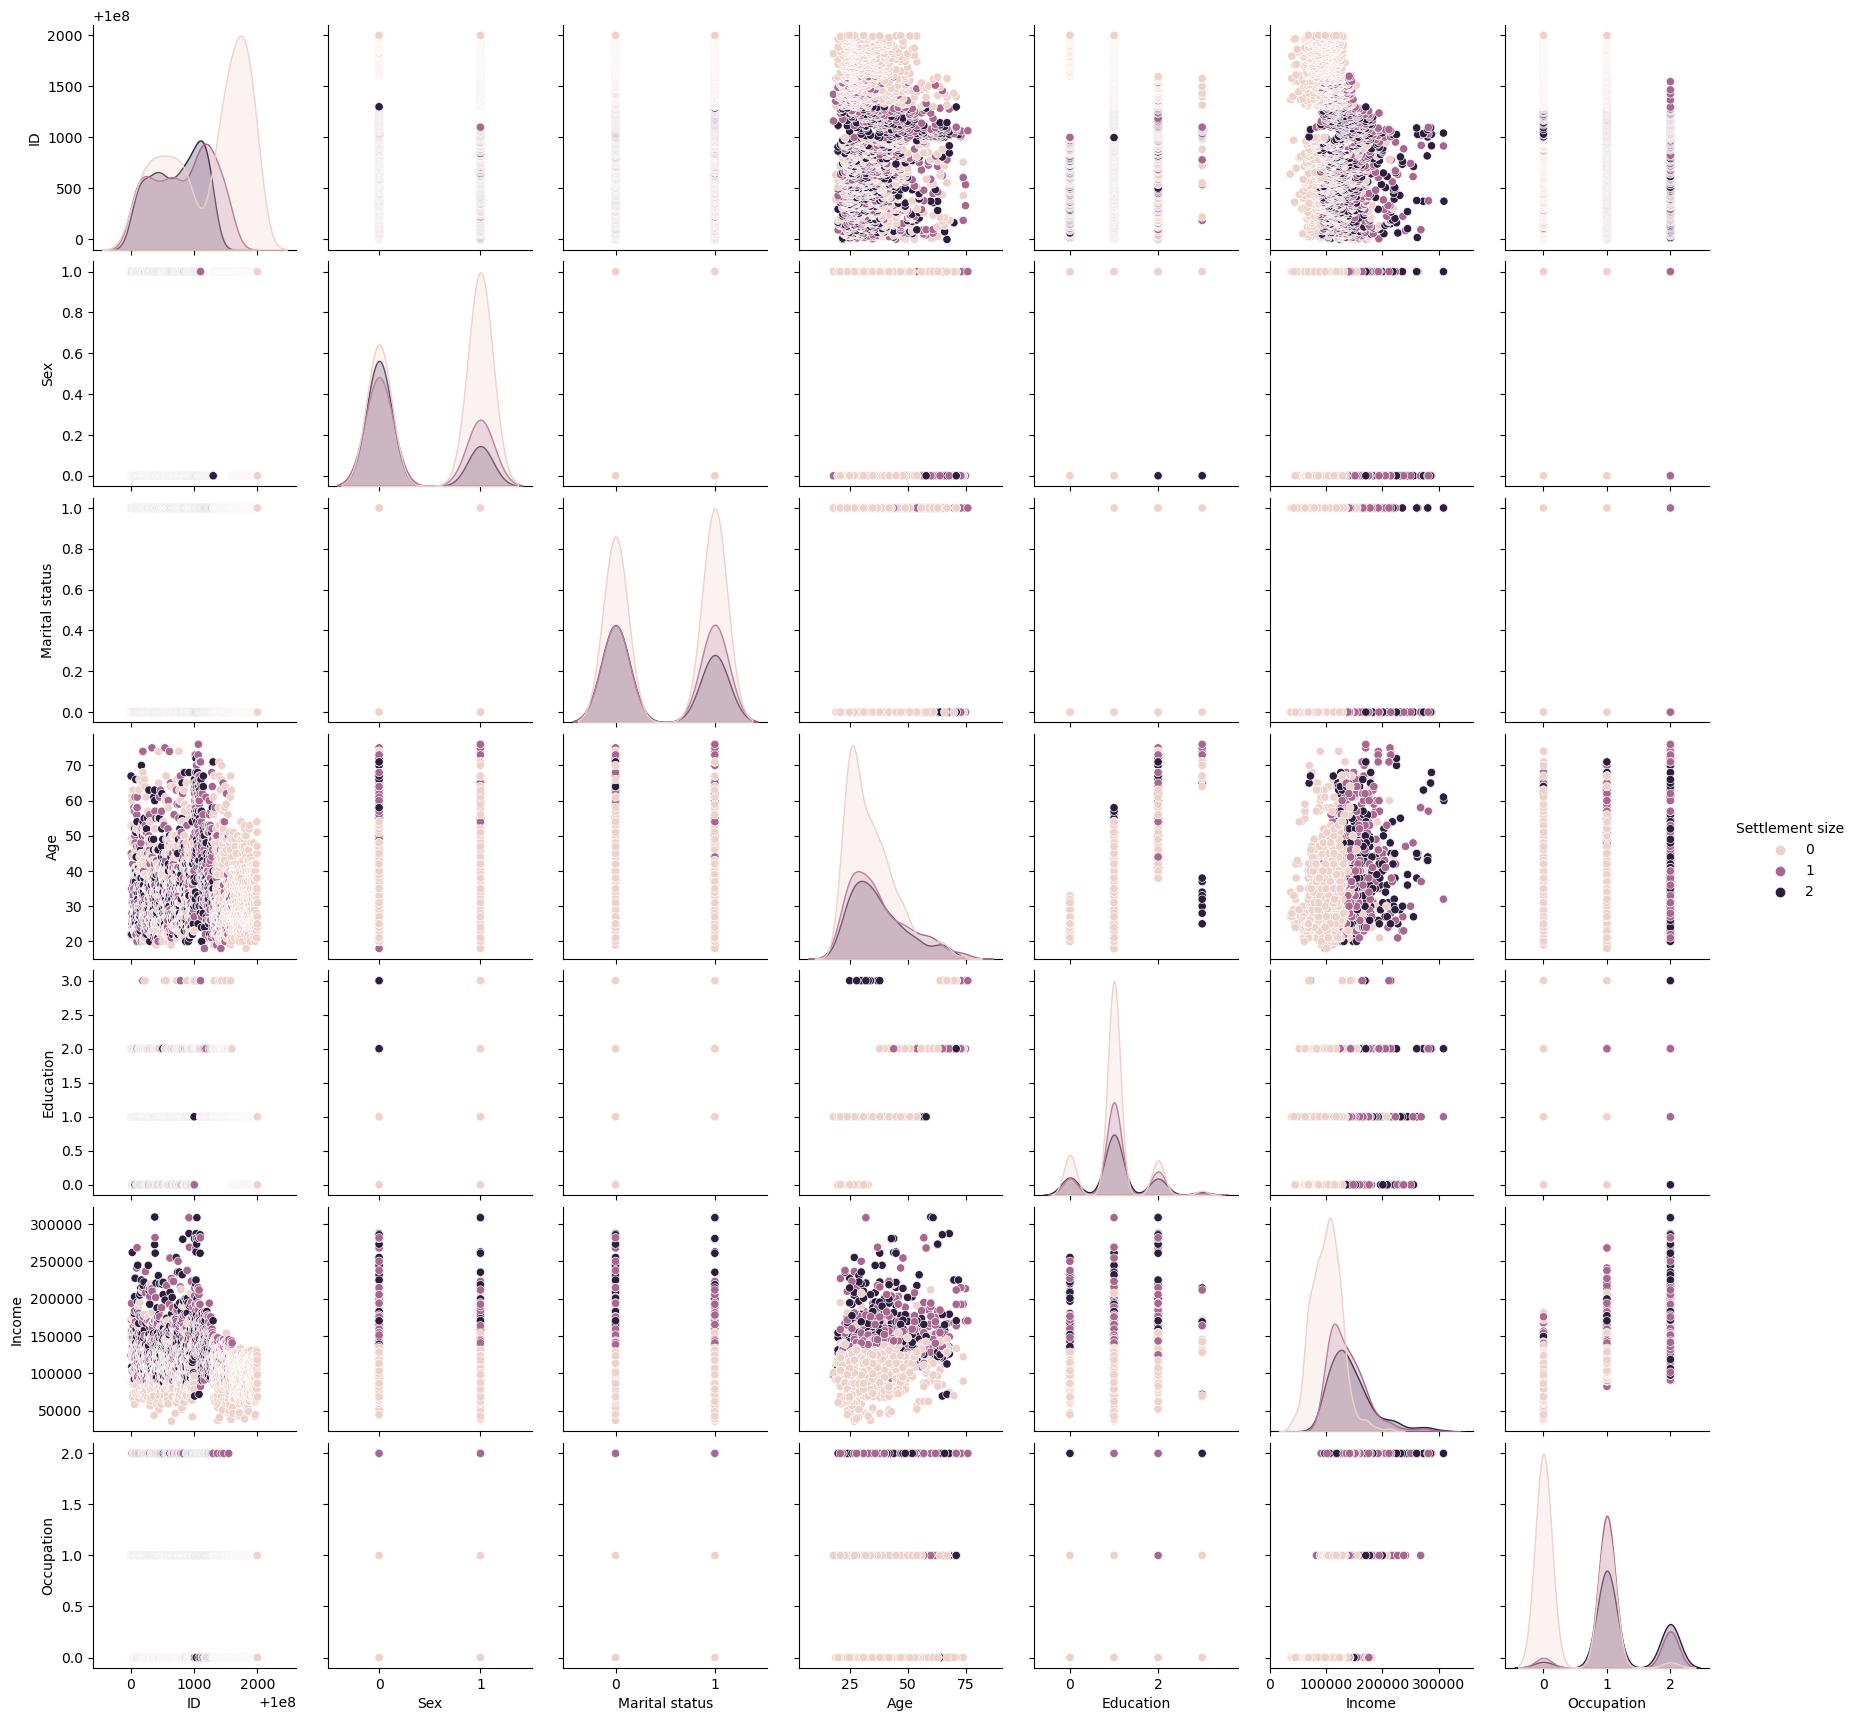

In [49]:
sns.pairplot(df,hue="Settlement size")

<AxesSubplot:xlabel='Age', ylabel='Income'>

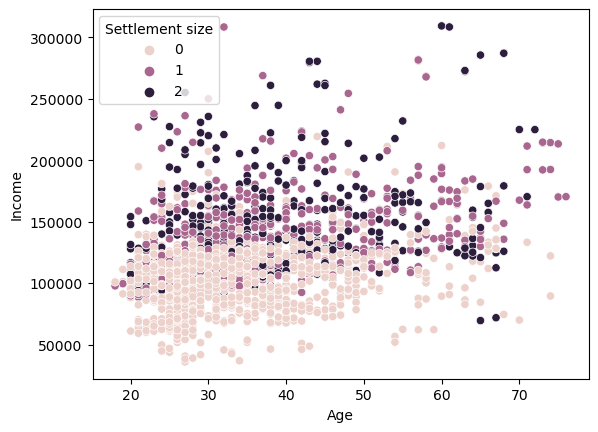

In [50]:
sns.scatterplot(x="Age",y="Income",hue="Settlement size",data=df)

In [51]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

# Create x

In [52]:
x=df[["Age","Income"]].values

In [53]:
x

array([[    67, 124670],
       [    22, 150773],
       [    49,  89210],
       ...,
       [    31,  86400],
       [    24,  97968],
       [    25,  68416]], dtype=int64)

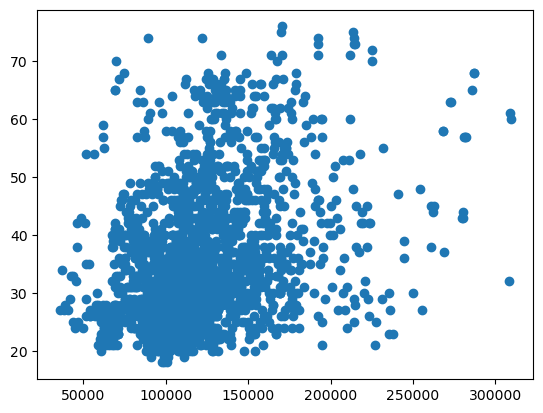

In [54]:
a=df["Income"]
b=df["Age"]
plt.scatter(a,b)
plt.show()

# Dendrogram (finding the optimum number of clusters)

In [55]:
import scipy.cluster.hierarchy as sch

In [56]:
data=sch.linkage(x,method="ward")

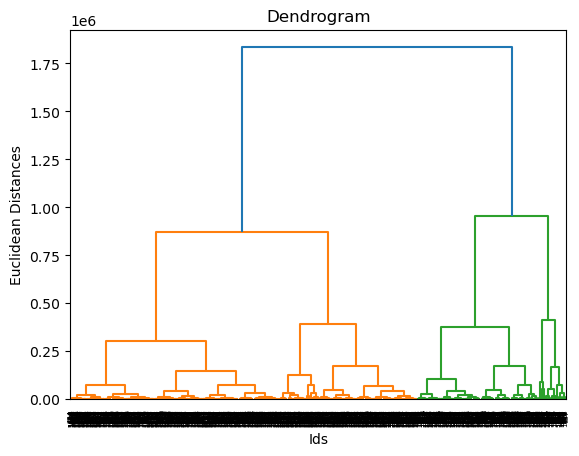

In [57]:
dendrogram=sch.dendrogram(data)
plt.title("Dendrogram")
plt.xlabel("Ids")
plt.ylabel("Euclidean Distances")
plt.show()

# Modelling (Hierarchichal Clustering)

In [58]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
ych=hc.fit_predict(x)

In [59]:
ych

array([1, 2, 0, ..., 0, 0, 0], dtype=int64)

# Visualising the Clusters

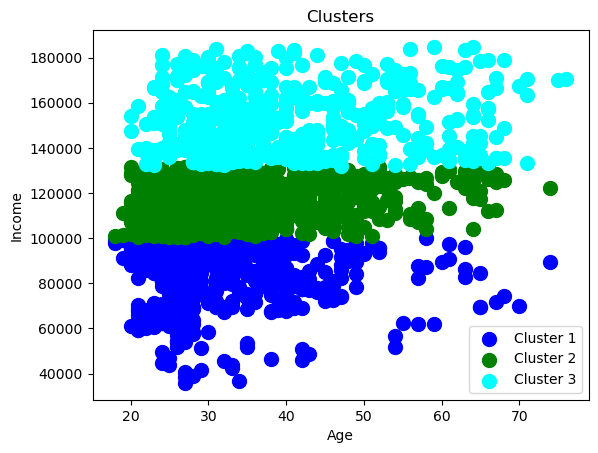

In [60]:
plt.scatter(x[ych==0,0], x[ych==0,1],
           s=100, c="blue", label="Cluster 1")
plt.scatter(x[ych==1,0], x[ych==1,1],
           s=100, c="green", label="Cluster 2")
plt.scatter(x[ych==2,0], x[ych==2,1],
           s=100, c="cyan", label="Cluster 3")

plt.title("Clusters")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()
           